Time series analysis
------

A time series analysis conducted. 

Following tutorials such as: 
- http://iot-ee.com/en/2017/08/07/analysing-iot-data-introduction-time-series-forecasting-python/

In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
import matplotlib
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
font = {'size'   : 10,
        'weight': 'bold'}
matplotlib.rc('font', **font)

**Read in and Prepare data.**

In [5]:
df = pd.read_json('../data/data_dec_2017_clean.json')

In [6]:
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y')
yrl = df.groupby(['unique_key', 'date']).size().reset_index().groupby('date').size()
yrl = yrl.astype('float64')

In [7]:
total_articles = len(yrl)

**Rolling average.**

/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()


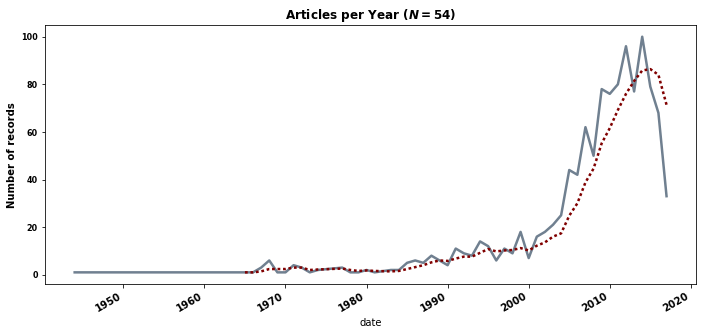

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.title('Articles per Year ($N={}$)'.format(total_articles), fontweight='bold')
plt.ylabel('Number of records', fontweight='bold')
ax.plot(yrl, color='slategray', zorder=1, linewidth=2.5)
plt.xticks(fontsize=10); plt.yticks(fontsize=8)

x = yrl.index
y = yrl.values

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., scatterpoints=1);

ax = pd.rolling_mean(yrl, 5).plot(linewidth=2.5, color='maroon', linestyle=':');#

# plt.savefig("/home/nightwing/rsc/Literature-Article/assets/images/timeseries.pdf",
#            format='pdf', bbox_inches='tight')

**Rolling average without arXiv.**

In [9]:
without_arxiv_df = df[df['provenance']!='arXiv']

In [10]:
yrl_without_arxiv = without_arxiv_df.groupby(['unique_key', 'date']).size().reset_index().groupby('date').size()
yrl_without_arxiv = yrl_without_arxiv.astype('float64')

In [11]:
total_articles = len(yrl_without_arxiv)

/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()


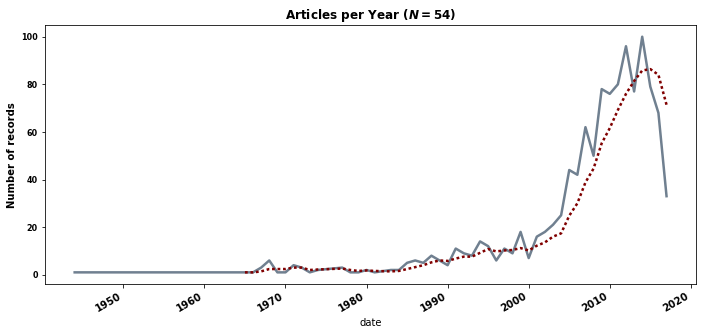

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.title('Articles per Year ($N={}$)'.format(total_articles), fontweight='bold')
plt.ylabel('Number of records', fontweight='bold')
ax.plot(yrl, color='slategray', zorder=1, linewidth=2.5)
plt.xticks(fontsize=10); plt.yticks(fontsize=8)

x = yrl.index
y = yrl.values

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., scatterpoints=1);

ax = pd.rolling_mean(yrl, 5).plot(linewidth=2.5, color='maroon', linestyle=':');

**Stationary.**

In [13]:
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()


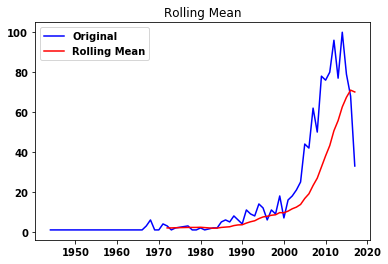

Results of Augmented Dickey-Fuller test:
Test Statistic                -5.837868e+00
p-value                        3.838572e-07
#Lags Used                     5.000000e+00
Number of Observations Used    4.800000e+01
Critical Value (1%)           -3.574589e+00
Critical Value (5%)           -2.923954e+00
Critical Value (10%)          -2.600039e+00
dtype: float64


In [14]:
test_stationarity(yrl)

**Residuals.**

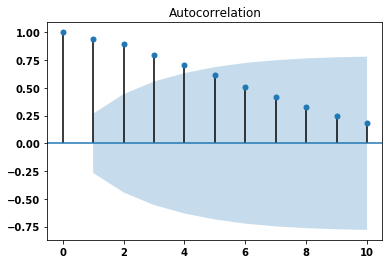

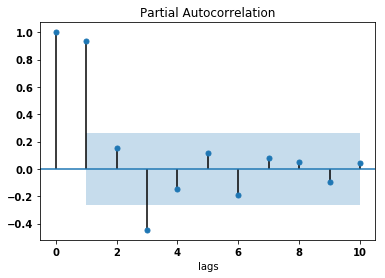

In [15]:
plot_acf(yrl, lags=10)
plot_pacf(yrl, lags=10)
plt.xlabel('lags')
plt.show()

**Choosing parameters.**

In [16]:
p = b = q = range(0, 2)
pq = itertools.product(p, b, q)
for param in pq:
    try:
        mod = ARIMA(yrl,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        print(pq)

ARMA(0, 0, 0) - AIC:519.6714347975285
ARMA(0, 0, 1) - AIC:477.5086351948131
ARMA(0, 1, 0) - AIC:397.3360066163878
ARMA(0, 1, 1) - AIC:396.3406612952392


/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


ARMA(1, 0, 0) - AIC:406.77351541182924
ARMA(1, 0, 1) - AIC:406.72739356848217
ARMA(1, 1, 0) - AIC:393.259249674315
ARMA(1, 1, 1) - AIC:391.32953798781807


/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/nightwing/anaconda3/envs/literature/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtyp

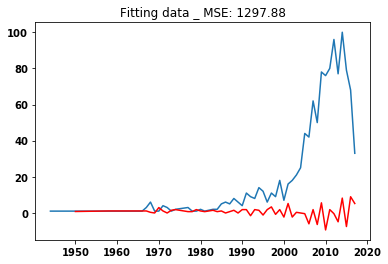

In [17]:
model = ARIMA(yrl, order=(1, 1, 0))  
results_MA = model.fit()  
plt.plot(yrl)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-yrl)**2).mean()))
plt.show()

**Forecast.**

In [18]:
forecast = results_MA.forecast(10)
forecast

(array([47.20276991, 42.96977524, 45.64446923, 45.73092434, 46.78716556,
        47.48003804, 48.309061  , 49.08706979, 49.88419306, 50.67415434]),
 array([ 9.32802634, 11.00158806, 13.1167898 , 14.70702975, 16.21798435,
        17.57305481, 18.84015622, 20.02397121, 21.14276548, 22.20484663]),
 array([[28.92017424, 65.48536558],
        [21.40705887, 64.53249162],
        [19.93603363, 71.35290483],
        [16.90567572, 74.55617297],
        [15.00050033, 78.5738308 ],
        [13.03748352, 81.92259256],
        [11.38303335, 85.23508865],
        [ 9.8408074 , 88.33333219],
        [ 8.44513418, 91.32325194],
        [ 7.15345466, 94.19485402]]))

In [19]:
forecast = pd.DataFrame(forecast[0], columns=['Forecast'])

In [20]:
forecast.index += 1

In [21]:
# file = open("/home/nightwing/rsc/Literature-Article/assets/predictions.tex", 'w')
# file.write('{}'.format(forecast.to_latex()))
# file.close()